In [1]:
from Mixture_Models import *

#### Simulating some data

In [2]:
data = make_pinwheel(radial_std=0.3, tangential_std=0.05, num_classes=3,
                         num_per_class=100, rate=0.4,rs=npr.RandomState(0))

#### Initializing the model

In [3]:
test_GMM = GMM_Constrainted(data)

#### Initializing the input parameters

In [4]:
npr.seed(10)
init_params = test_GMM.init_params(num_components=3,scale=0.5)
print(init_params) 
#### Notice how only a single set of 'lower triangle' matrices have been initialized as here all the components share the same covariance

{'log proportions': array([ 0.66579325,  0.35763949, -0.77270015]), 'means': array([[-0.00419192,  0.31066799],
       [-0.36004278,  0.13275579],
       [ 0.05427426,  0.00214572]]), 'lower triangles': array([[1., 0.],
       [0., 1.]])}


#### Fitting the model with the above initialization parameters

In [5]:
## we are using gradient descent with momentum for 100 iterations with mass = 0.8 and learning rate = 9e-4
params_store = test_GMM.fit(init_params,"grad_descent", learning_rate = 0.0009, mass = 0.8, maxiter = 100) 

Log likelihood -720.8092616186832
Log likelihood -713.8910013012256
Log likelihood -702.195833872699
Log likelihood -688.2919666478815
Log likelihood -675.2823078440513
Log likelihood -666.5030146185011
Log likelihood -664.031879949132
Log likelihood -666.0491930198807
Log likelihood -666.9097879692818
Log likelihood -663.5416942201681
Log likelihood -658.8410584727726
Log likelihood -656.1822817270356
Log likelihood -655.9076644742253
Log likelihood -656.728309097562
Log likelihood -657.4636940077586
Log likelihood -657.6045582599806
Log likelihood -657.2151833894802
Log likelihood -656.646931166686
Log likelihood -656.2469514067093
Log likelihood -656.1509787800867
Log likelihood -656.2430409113252
Log likelihood -656.3005158643215
Log likelihood -656.1967074174464
Log likelihood -655.9754658780909
Log likelihood -655.7613378601483
Log likelihood -655.6368058913608
Log likelihood -655.6006199196472
Log likelihood -655.6031292410108
Log likelihood -655.5977650846363
Log likelihood -65

#### Posthoc analysis

In [6]:
### We define an auxillary function for plotting the clusters
def draw_clusters(unpacked_params,input_data):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    for log_proportion, mean, cov_sqrt in zip(*unpacked_params):
        num_points = 100
        alpha = np.minimum(1.0, np.exp(log_proportion) * 10)
        angles = np.linspace(0, 2*np.pi, num_points)
        circle_pts = np.vstack([np.cos(angles), np.sin(angles)]).T * 2.0
        cur_pts = mean + np.dot(circle_pts, cov_sqrt)
        ax.plot(cur_pts[:, 0], cur_pts[:, 1], '-', alpha=alpha)
        ax.plot(input_data[:, 0], input_data[:, 1], 'k.')
    ax.plot(input_data[:, 0], input_data[:, 1], 'k.')

    plt.show()
    

likelihood -720.8092616186832
aic,bic 1463.6185232373664 1504.3601304585845


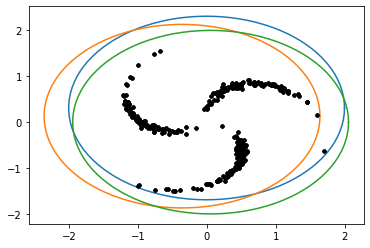

mpkl 0.0
likelihood -713.8910013012256
aic,bic 1449.7820026024513 1490.5236098236694


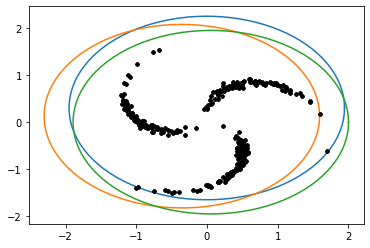

mpkl 0.0
likelihood -702.195833872699
aic,bic 1426.391667745398 1467.1332749666162


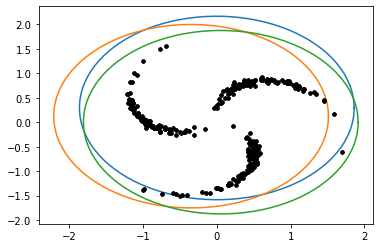

mpkl 0.0
likelihood -688.2919666478815
aic,bic 1398.583933295763 1439.3255405169812


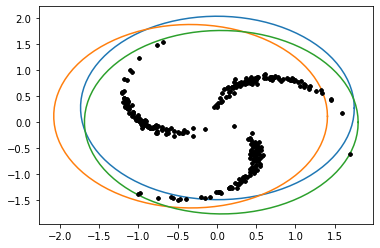

mpkl 0.0
likelihood -675.2823078440513
aic,bic 1372.5646156881025 1413.3062229093207


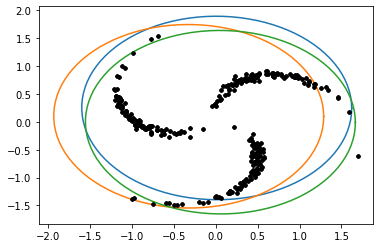

mpkl 0.0
likelihood -666.5030146185011
aic,bic 1355.0060292370022 1395.7476364582203


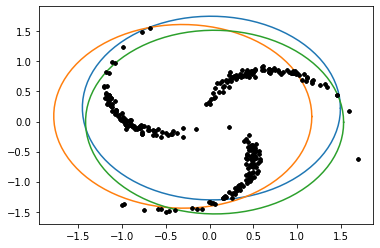

mpkl 0.0
likelihood -664.031879949132
aic,bic 1350.063759898264 1390.805367119482


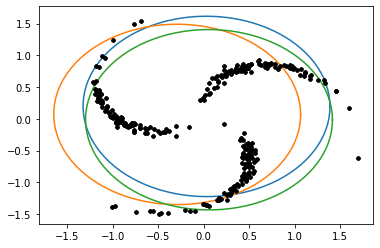

mpkl 0.0
likelihood -666.0491930198807
aic,bic 1354.0983860397614 1394.8399932609796


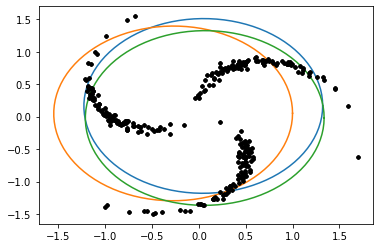

mpkl 0.0
likelihood -666.9097879692818
aic,bic 1355.8195759385635 1396.5611831597816


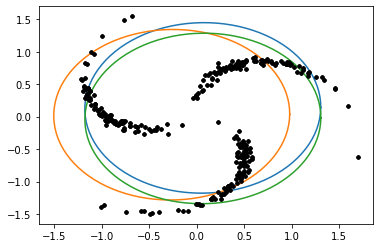

mpkl 0.0
likelihood -663.5416942201681
aic,bic 1349.0833884403362 1389.8249956615543


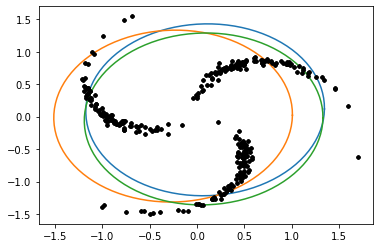

mpkl 0.0
likelihood -658.8410584727726
aic,bic 1339.6821169455452 1380.4237241667633


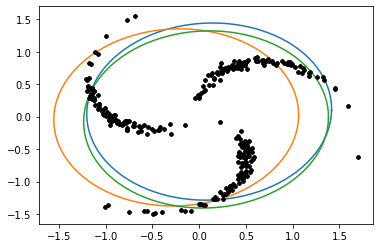

mpkl 0.0
likelihood -656.1822817270356
aic,bic 1334.3645634540712 1375.1061706752894


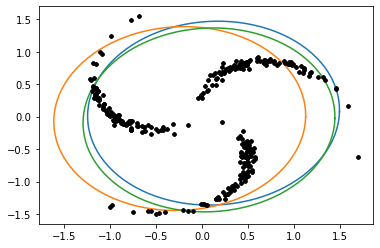

mpkl 0.0
likelihood -655.9076644742253
aic,bic 1333.8153289484505 1374.5569361696687


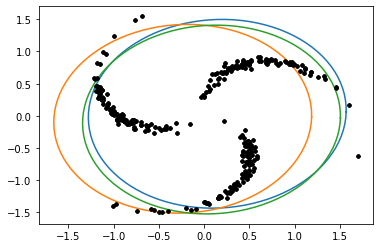

mpkl 0.0
likelihood -656.728309097562
aic,bic 1335.456618195124 1376.1982254163422


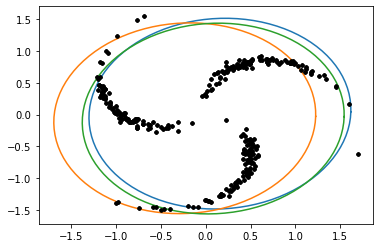

mpkl 0.0
likelihood -657.4636940077586
aic,bic 1336.9273880155172 1377.6689952367353


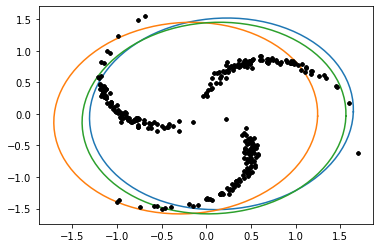

mpkl 0.0
likelihood -657.6045582599806
aic,bic 1337.2091165199613 1377.9507237411794


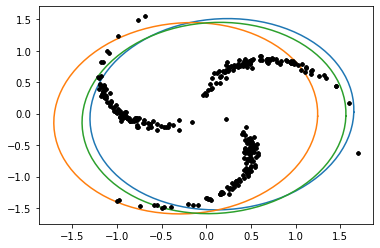

mpkl 0.0
likelihood -657.2151833894802
aic,bic 1336.4303667789604 1377.1719740001786


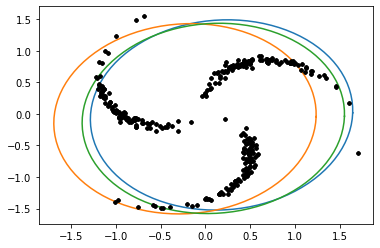

mpkl 0.0
likelihood -656.646931166686
aic,bic 1335.293862333372 1376.0354695545902


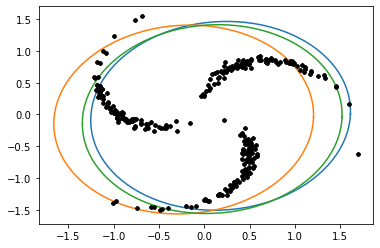

mpkl 0.0
likelihood -656.2469514067093
aic,bic 1334.4939028134186 1375.2355100346367


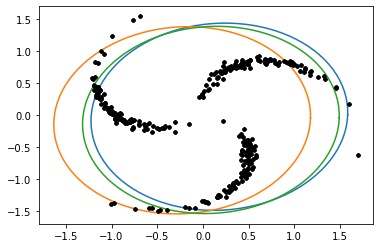

mpkl 0.0
likelihood -656.1509787800867
aic,bic 1334.3019575601734 1375.0435647813915


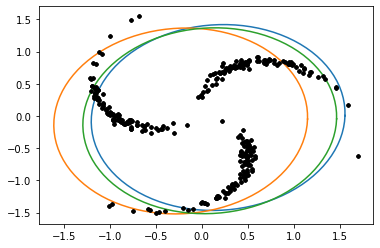

mpkl 0.0
likelihood -656.2430409113252
aic,bic 1334.4860818226505 1375.2276890438686


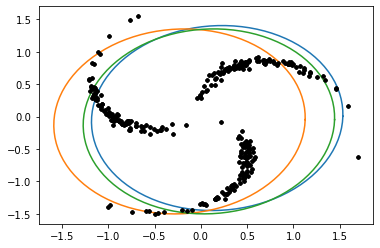

mpkl 0.0
likelihood -656.3005158643215
aic,bic 1334.601031728643 1375.342638949861


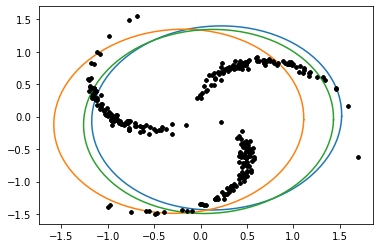

mpkl 0.0
likelihood -656.1967074174464
aic,bic 1334.3934148348928 1375.135022056111


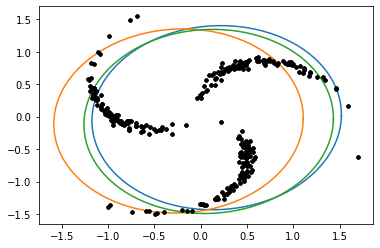

mpkl 0.0
likelihood -655.9754658780909
aic,bic 1333.9509317561817 1374.6925389773999


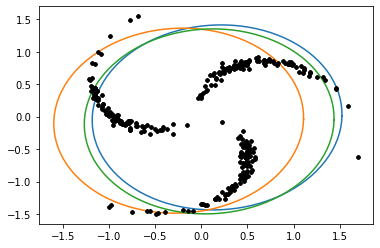

mpkl 0.0
likelihood -655.7613378601483
aic,bic 1333.5226757202965 1374.2642829415147


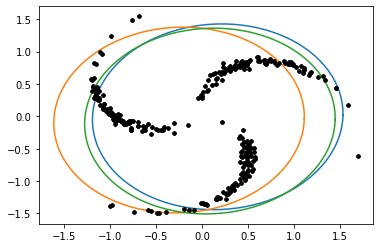

mpkl 0.0
likelihood -655.6368058913608
aic,bic 1333.2736117827217 1374.0152190039398


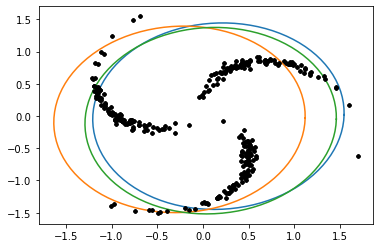

mpkl 0.0
likelihood -655.6006199196472
aic,bic 1333.2012398392944 1373.9428470605126


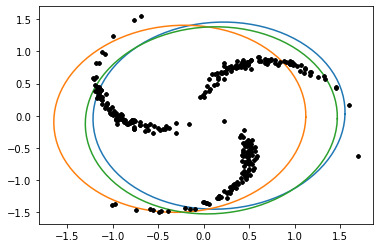

mpkl 0.0
likelihood -655.6031292410108
aic,bic 1333.2062584820217 1373.9478657032398


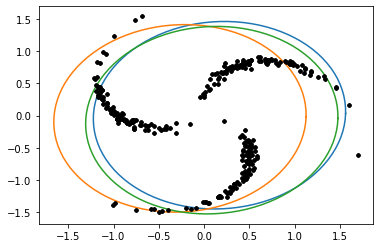

mpkl 0.0
likelihood -655.5977650846363
aic,bic 1333.1955301692726 1373.9371373904908


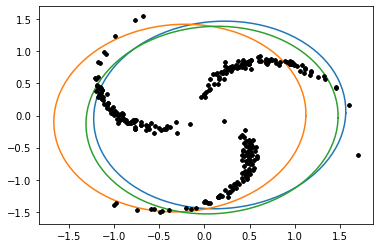

mpkl 0.0
likelihood -655.567626860383
aic,bic 1333.135253720766 1373.8768609419842


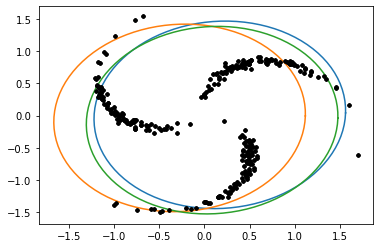

mpkl 0.0
likelihood -655.5223417167549
aic,bic 1333.0446834335098 1373.786290654728


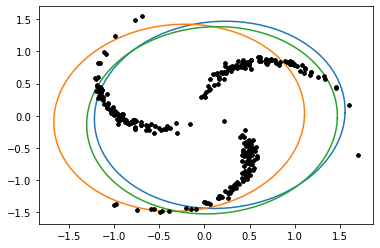

mpkl 0.0
likelihood -655.47991167298
aic,bic 1332.95982334596 1373.7014305671782


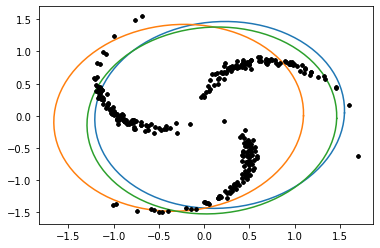

mpkl 0.0
likelihood -655.4504396469138
aic,bic 1332.9008792938275 1373.6424865150457


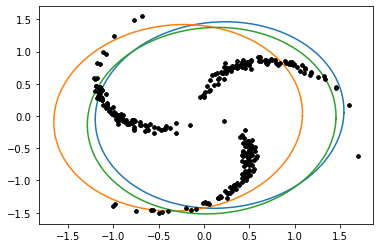

mpkl 0.0
likelihood -655.4311881007607
aic,bic 1332.8623762015213 1373.6039834227395


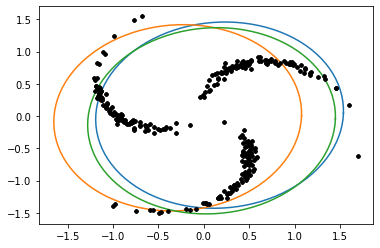

mpkl 0.0
likelihood -655.4122925713627
aic,bic 1332.8245851427255 1373.5661923639436


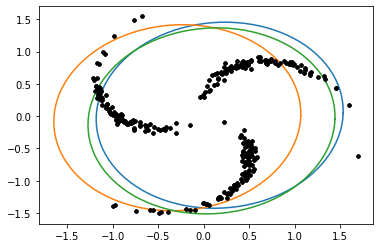

mpkl 0.0
likelihood -655.3856622584873
aic,bic 1332.7713245169746 1373.5129317381927


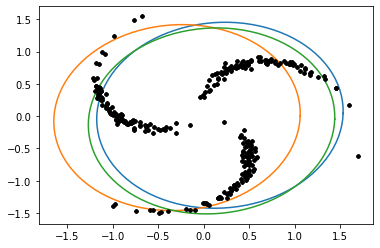

mpkl 0.0
likelihood -655.3497202422618
aic,bic 1332.6994404845236 1373.4410477057418


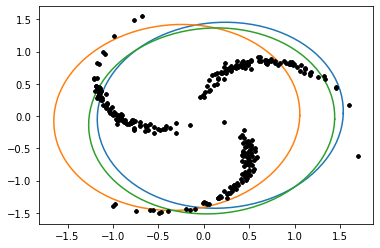

mpkl 0.0
likelihood -655.3079949435312
aic,bic 1332.6159898870624 1373.3575971082805


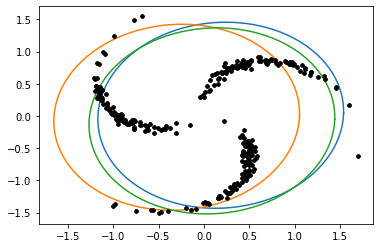

mpkl 0.0
likelihood -655.2647129438473
aic,bic 1332.5294258876945 1373.2710331089127


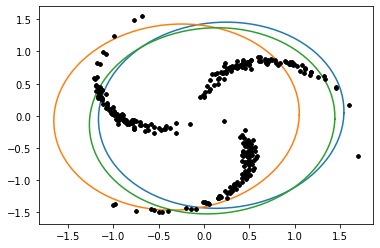

mpkl 0.0
likelihood -655.2215623140511
aic,bic 1332.4431246281022 1373.1847318493203


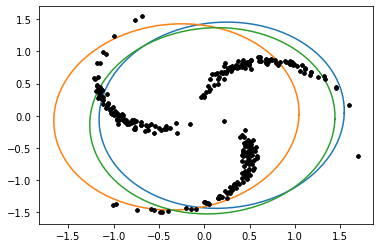

mpkl 0.0
likelihood -655.1773716498818
aic,bic 1332.3547432997636 1373.0963505209818


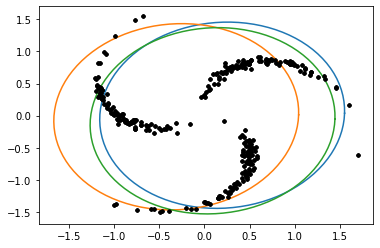

mpkl 0.0
likelihood -655.129737610246
aic,bic 1332.259475220492 1373.0010824417102


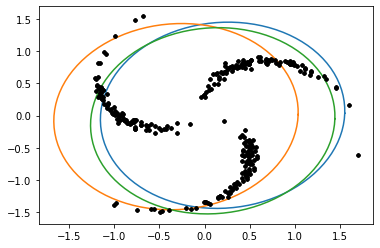

mpkl 0.0
likelihood -655.0767155302411
aic,bic 1332.1534310604823 1372.8950382817004


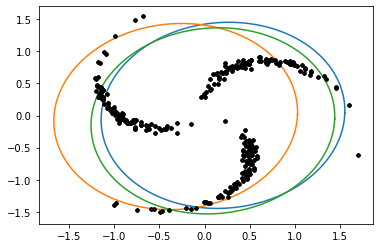

mpkl 0.0
likelihood -655.0174292161701
aic,bic 1332.0348584323401 1372.7764656535583


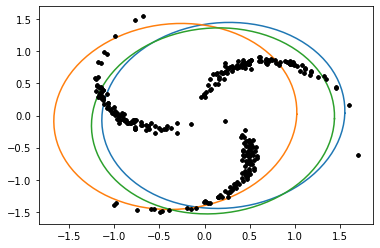

mpkl 0.0
likelihood -654.9516352237041
aic,bic 1331.9032704474082 1372.6448776686263


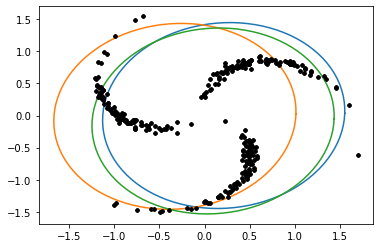

mpkl 0.0
likelihood -654.8789375314541
aic,bic 1331.7578750629082 1372.4994822841263


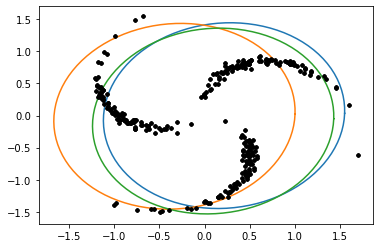

mpkl 0.0
likelihood -654.7982877073642
aic,bic 1331.5965754147285 1372.3381826359466


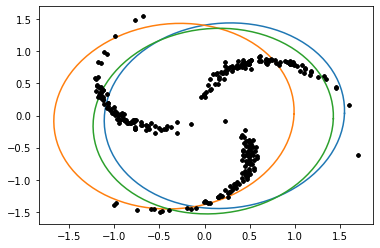

mpkl 0.0
likelihood -654.7079566009695
aic,bic 1331.415913201939 1372.1575204231572


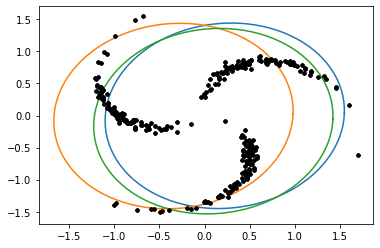

mpkl 0.0
likelihood -654.6057669559475
aic,bic 1331.211533911895 1371.9531411331131


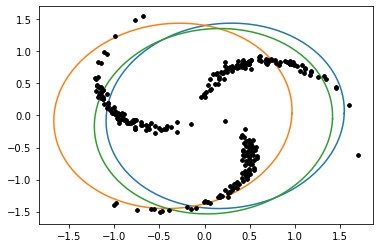

mpkl 0.0
likelihood -654.4892677029925
aic,bic 1330.978535405985 1371.7201426272031


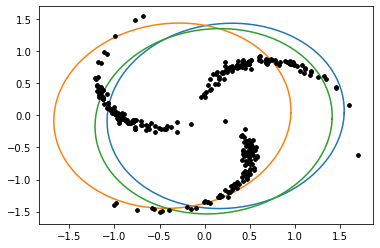

mpkl 0.0
likelihood -654.355668521179
aic,bic 1330.711337042358 1371.4529442635762


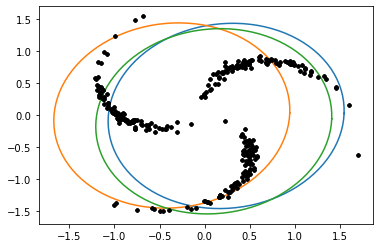

mpkl 0.0
likelihood -654.2015479016842
aic,bic 1330.4030958033684 1371.1447030245865


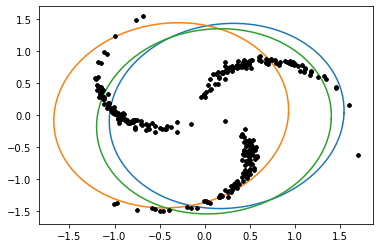

mpkl 0.0
likelihood -654.0224424330945
aic,bic 1330.044884866189 1370.7864920874072


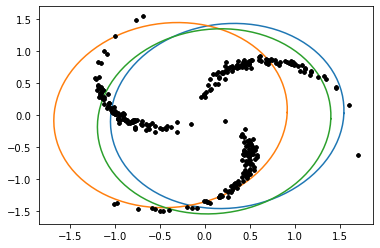

mpkl 0.0
likelihood -653.8123871302296
aic,bic 1329.6247742604592 1370.3663814816773


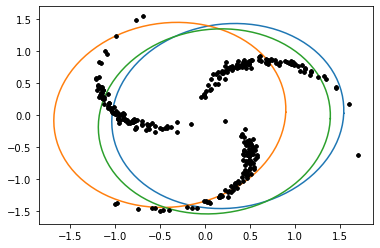

mpkl 0.0
likelihood -653.5633697324238
aic,bic 1329.1267394648476 1369.8683466860657


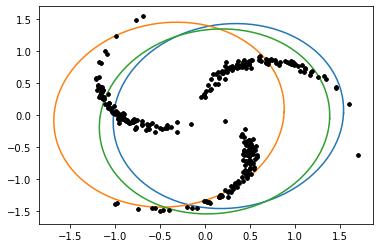

mpkl 0.0
likelihood -653.264559700791
aic,bic 1328.529119401582 1369.2707266228


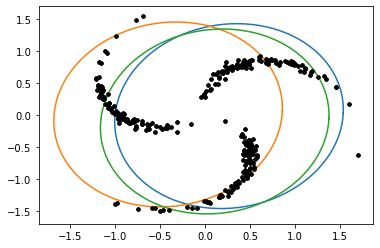

mpkl 0.0
likelihood -652.9010970969642
aic,bic 1327.8021941939285 1368.5438014151466


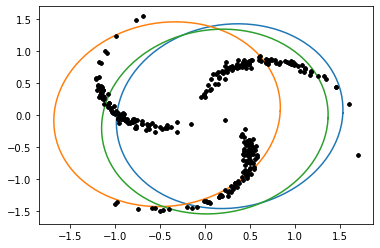

mpkl 0.0
likelihood -652.4521386299452
aic,bic 1326.9042772598905 1367.6458844811086


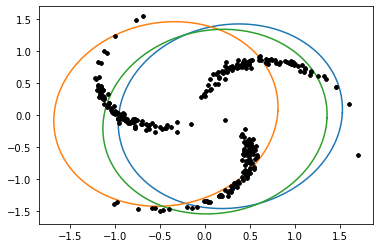

mpkl 0.0
likelihood -651.887678231076
aic,bic 1325.775356462152 1366.5169636833702


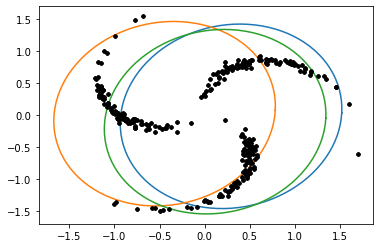

mpkl 0.0
likelihood -651.1632743920534
aic,bic 1324.3265487841068 1365.068156005325


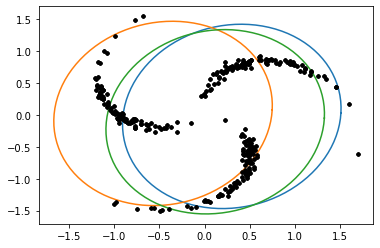

mpkl 0.0
likelihood -650.211040859507
aic,bic 1322.422081719014 1363.163688940232


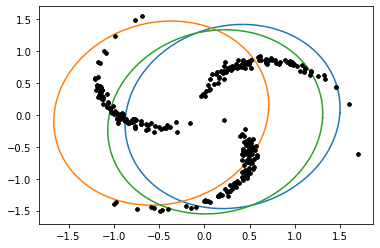

mpkl 0.0
likelihood -648.9237315417921
aic,bic 1319.8474630835842 1360.5890703048024


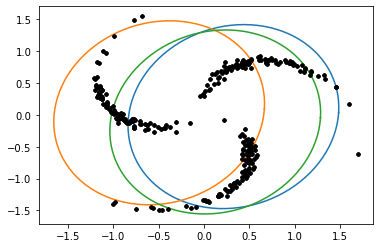

mpkl 0.0
likelihood -647.1257869477217
aic,bic 1316.2515738954435 1356.9931811166616


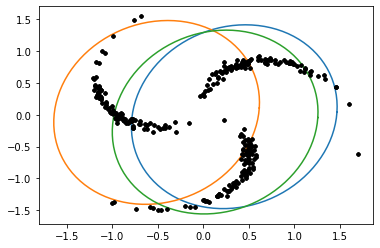

mpkl 0.0
likelihood -644.5198338887748
aic,bic 1311.0396677775495 1351.7812749987677


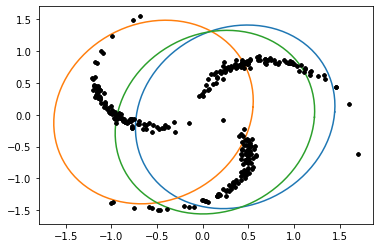

mpkl 0.0
likelihood -640.590168836063
aic,bic 1303.180337672126 1343.921944893344


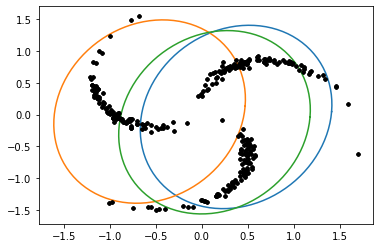

mpkl 0.0
likelihood -634.453878421491
aic,bic 1290.907756842982 1331.6493640642002


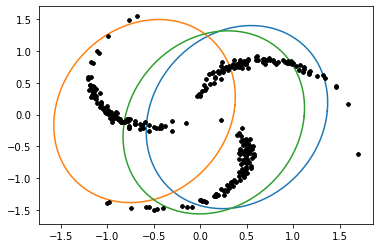

mpkl 0.0
likelihood -624.7894042555754
aic,bic 1271.5788085111508 1312.320415732369


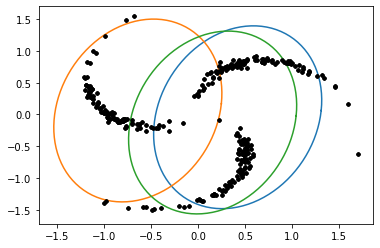

mpkl 0.0
likelihood -610.7054281173764
aic,bic 1243.4108562347528 1284.152463455971


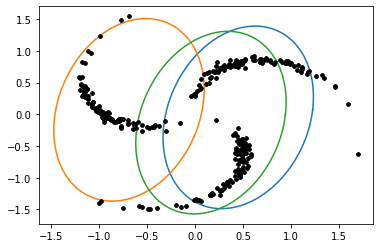

mpkl 0.0
likelihood -595.8929753952141
aic,bic 1213.7859507904282 1254.5275580116463


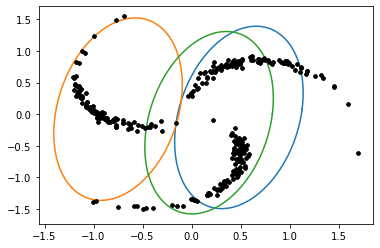

mpkl 0.0
likelihood -590.0503010612798
aic,bic 1202.1006021225596 1242.8422093437778


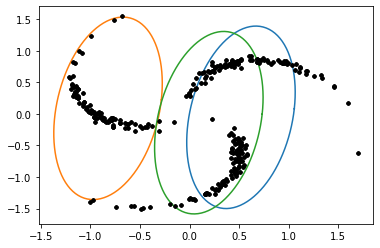

mpkl 0.0
likelihood -585.873720799338
aic,bic 1193.747441598676 1234.4890488198942


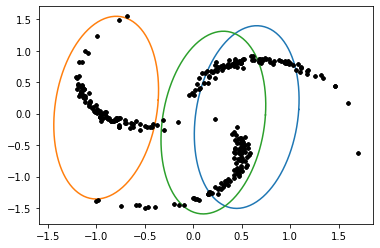

mpkl 0.0
likelihood -588.0738130399614
aic,bic 1198.1476260799227 1238.8892333011408


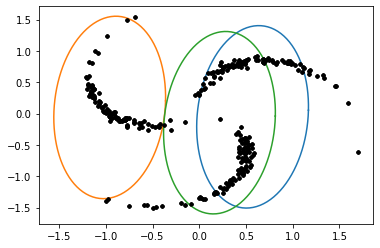

mpkl 0.0
likelihood -592.5696408764352
aic,bic 1207.1392817528704 1247.8808889740885


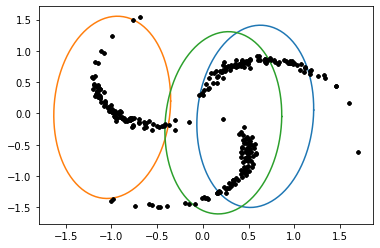

mpkl 0.0
likelihood -592.0752101465772
aic,bic 1206.1504202931544 1246.8920275143726


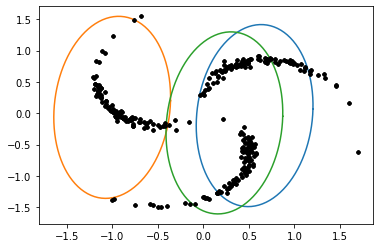

mpkl 0.0
likelihood -588.1870615453909
aic,bic 1198.3741230907817 1239.1157303119999


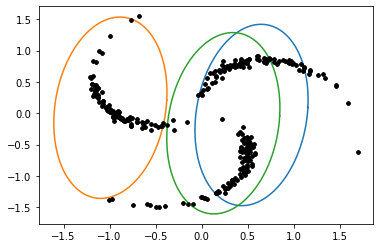

mpkl 0.0
likelihood -585.4412731890288
aic,bic 1192.8825463780577 1233.6241535992758


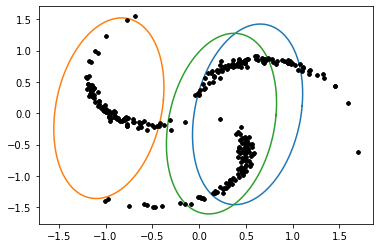

mpkl 0.0
likelihood -583.6621756210948
aic,bic 1189.3243512421896 1230.0659584634077


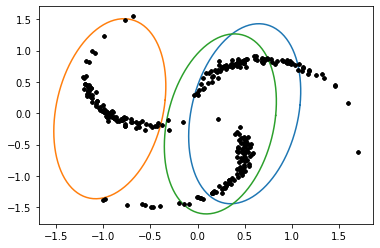

mpkl 0.0
likelihood -582.6830779146201
aic,bic 1187.3661558292401 1228.1077630504583


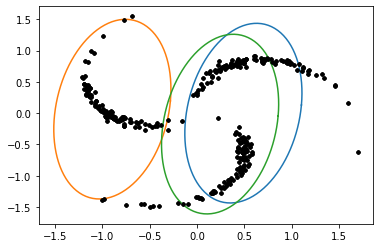

mpkl 0.0
likelihood -583.1128046980821
aic,bic 1188.2256093961641 1228.9672166173823


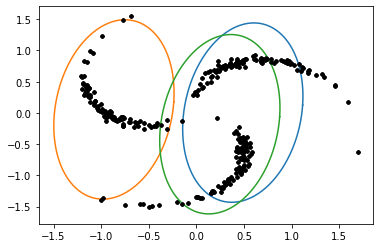

mpkl 0.0
likelihood -583.194082486616
aic,bic 1188.388164973232 1229.1297721944502


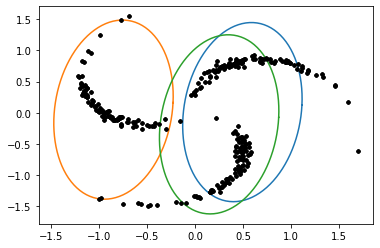

mpkl 0.0
likelihood -582.8444112664059
aic,bic 1187.6888225328119 1228.43042975403


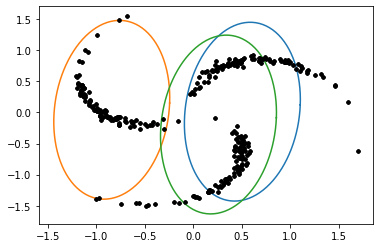

mpkl 0.0
likelihood -582.4307430330485
aic,bic 1186.861486066097 1227.6030932873152


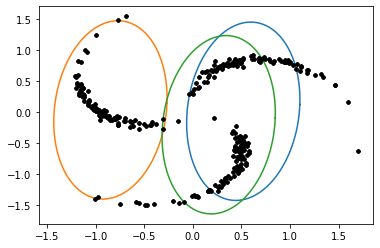

mpkl 0.0
likelihood -581.6988089488694
aic,bic 1185.3976178977389 1226.139225118957


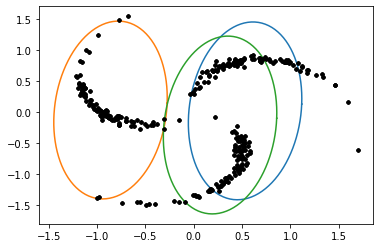

mpkl 0.0
likelihood -581.2909943893962
aic,bic 1184.5819887787925 1225.3235960000106


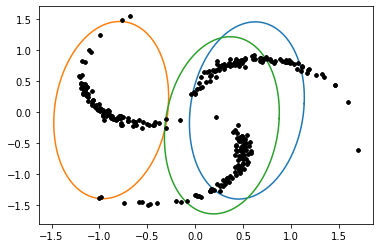

mpkl 0.0
likelihood -581.1848325806087
aic,bic 1184.3696651612174 1225.1112723824356


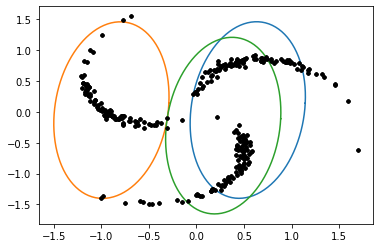

mpkl 0.0
likelihood -581.0255378482976
aic,bic 1184.0510756965953 1224.7926829178134


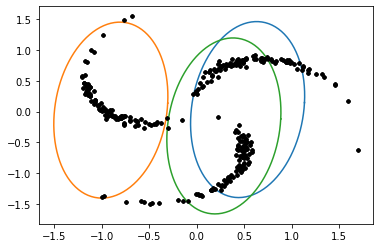

mpkl 0.0
likelihood -580.9109741159425
aic,bic 1183.821948231885 1224.5635554531032


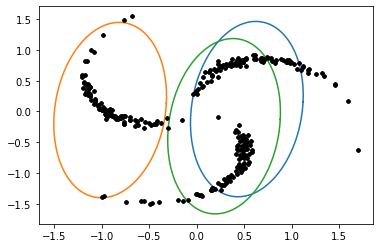

mpkl 0.0
likelihood -580.7769545613996
aic,bic 1183.5539091227993 1224.2955163440174


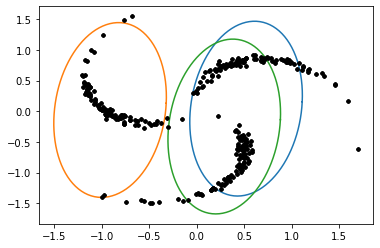

mpkl 0.0
likelihood -580.5963946983987
aic,bic 1183.1927893967975 1223.9343966180156


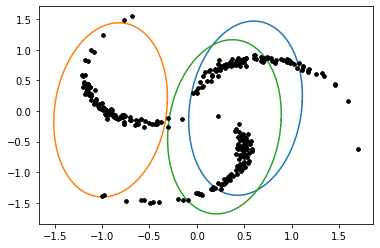

mpkl 0.0
likelihood -580.4390352281251
aic,bic 1182.8780704562503 1223.6196776774684


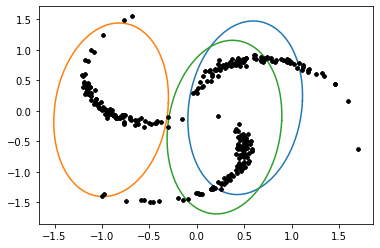

mpkl 0.0
likelihood -580.2387929945297
aic,bic 1182.4775859890594 1223.2191932102776


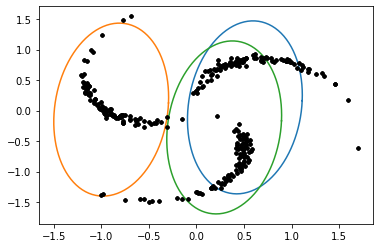

mpkl 0.0
likelihood -580.0434847519352
aic,bic 1182.0869695038705 1222.8285767250886


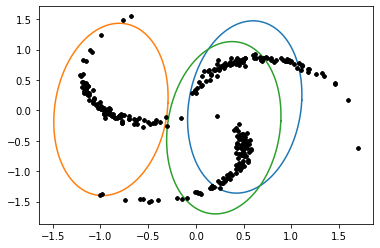

mpkl 0.0
likelihood -579.8865420223254
aic,bic 1181.773084044651 1222.514691265869


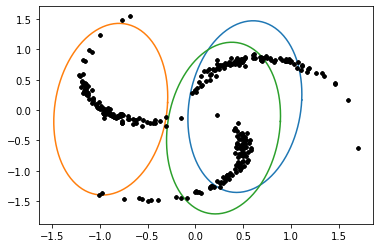

mpkl 0.0
likelihood -579.7208986433076
aic,bic 1181.4417972866152 1222.1834045078333


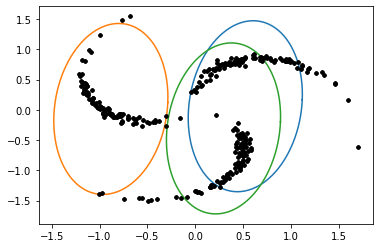

mpkl 0.0
likelihood -579.5622762620139
aic,bic 1181.1245525240279 1221.866159745246


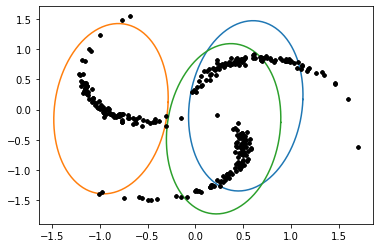

mpkl 0.0
likelihood -579.3909736987075
aic,bic 1180.781947397415 1221.5235546186332


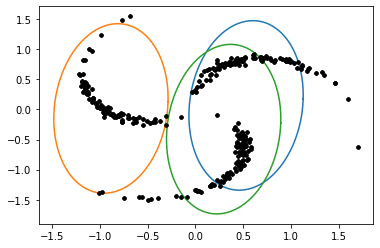

mpkl 0.0
likelihood -579.183746825154
aic,bic 1180.367493650308 1221.1091008715262


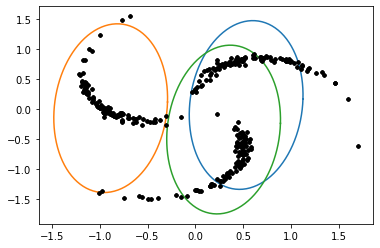

mpkl 0.0
likelihood -578.9605669819441
aic,bic 1179.9211339638882 1220.6627411851064


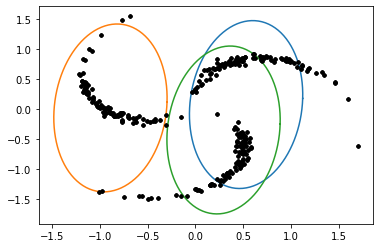

mpkl 0.0
likelihood -578.7249612076973
aic,bic 1179.4499224153947 1220.1915296366128


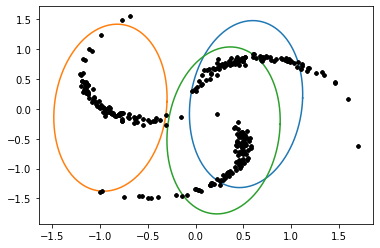

mpkl 0.0
likelihood -578.4843451649748
aic,bic 1178.9686903299496 1219.7102975511677


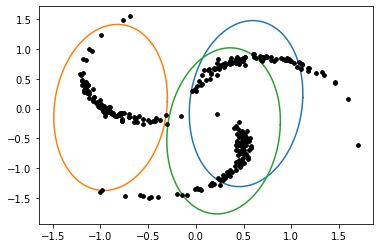

mpkl 0.0


In [7]:
for params in params_store:
    print("likelihood",test_GMM.likelihood(params))
    print("aic,bic",test_GMM.aic(params),test_GMM.bic(params))
    

    draw_clusters(test_GMM.unpack_params(params),data)
    kl_cov = []
    for log_proportion, mean, cov_sqrt in zip(*test_GMM.unpack_params(params)):
        kl_cov.append(cov_sqrt.T @ cov_sqrt)
    print("mpkl",test_GMM.print_mpkl(params['means'],kl_cov))

In [8]:
### Final labels

np.array(test_GMM.labels(data,params_store[-1]))

array([1, 0, 1, 2, 0, 0, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 2, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])